<a href="https://colab.research.google.com/github/HafizMayo/CNN_Classifier/blob/main/Chest_Xray_Classsifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizwanmeo","key":"20614299dc19465b09e646638351d7c2"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           1245  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20            720  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59             93  
nehaprabhavalkar/indian-food-101                                  Indian Food 101                                        7KB  2020-09-30 06:23:43           1119  
christianlillelund/don

In [8]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:31<00:00, 15.9MB/s]
100% 2.29G/2.29G [00:31<00:00, 78.3MB/s]


In [9]:
! mkdir data

In [10]:
! unzip /content/chest-xray-pneumonia.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0447-0001.jpeg  

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
normal_chest = cv2.imread('/content/data/chest_xray/train/NORMAL/IM-0125-0001.jpeg')

In [16]:
normal_chest.shape

(1125, 1600, 3)

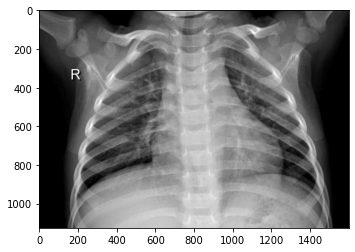

In [17]:
normal_chest = cv2.cvtColor(normal_chest, cv2.COLOR_BGR2RGB)
plt.imshow(normal_chest)

In [19]:
pneumonia_chest = cv2.imread('/content/data/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg')
pneumonia_chest.shape

(768, 1072, 3)

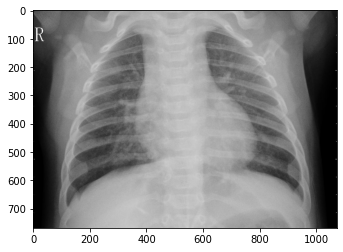

In [22]:
pneumonia_chest = cv2.cvtColor(pneumonia_chest, cv2.COLOR_BGR2RGB)
plt.imshow(pneumonia_chest)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
image_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, rescale = 1/255,
shear_range=0.2, zoom_range=0.2, horizontal_flip = True,fill_mode='nearest')

In [26]:
image_gen.random_transform(pneumonia_chest)
print('done')

done


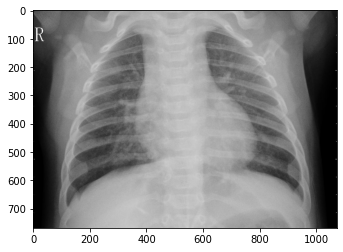

In [28]:
plt.imshow(pneumonia_chest)

done


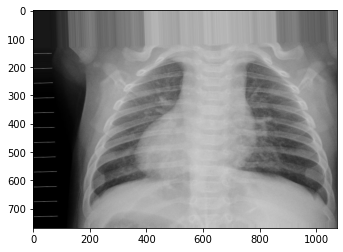

In [29]:
plt.imshow(image_gen.random_transform(pneumonia_chest))
print('done')

In [30]:
image_gen.flow_from_directory('/content/data/chest_xray/train')

Found 5216 images belonging to 2 classes.


In [31]:
image_gen.flow_from_directory('/content/data/chest_xray/val')

Found 16 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory('/content/data/chest_xray/test')

Found 624 images belonging to 2 classes.


In [33]:
input_shape=(256,256,3)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout

In [69]:
model = Sequential()
#block #1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#block #2
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#block# 3
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#block# 4
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#block #5
model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#block #6
model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [71]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 28, 28, 64)      

In [72]:
input_shape= (256,256,3)

In [74]:
batch_size =32
train_gen = image_gen.flow_from_directory('/content/data/chest_xray/train',
                                          target_size=input_shape[:2],
                                          batch_size=batch_size,
                                          class_mode='binary')

val_gen = image_gen.flow_from_directory('/content/data/chest_xray/val',
                                          target_size=input_shape[:2],
                                          batch_size=batch_size,
                                          class_mode='binary')

test_gen = image_gen.flow_from_directory('/content/data/chest_xray/test',
                                          target_size=input_shape[:2],
                                          batch_size=batch_size,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [75]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [76]:
results = model.fit_generator(train_gen, epochs=10, steps_per_epoch=50, validation_data=val_gen,
                              validation_steps=12)

Epoch 1/10
50/50 [==============================] - 40s 802ms/step - loss: 0.6056 - accuracy: 0.7275 - val_loss: 0.7728 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 39s 786ms/step - loss: 0.5277 - accuracy: 0.7275
Epoch 3/10
50/50 [==============================] - 39s 775ms/step - loss: 0.4665 - accuracy: 0.7600
Epoch 4/10
50/50 [==============================] - 39s 772ms/step - loss: 0.4748 - accuracy: 0.7494
Epoch 5/10
50/50 [==============================] - 39s 773ms/step - loss: 0.4386 - accuracy: 0.7713
Epoch 6/10
50/50 [==============================] - 39s 775ms/step - loss: 0.3531 - accuracy: 0.8456
Epoch 7/10
50/50 [==============================] - 38s 767ms/step - loss: 0.3171 - accuracy: 0.8675
Epoch 8/10
50/50 [==============================] - 39s 775ms/step - loss: 0.2991 - accuracy: 0.8763
Epoch 9/10
50/50 [==============================] - 38s 766ms/step - loss: 0.2689 - accuracy: 0.8875
Epoch 10/10
50/50 [==============================

In [77]:
type(results)

tensorflow.python.keras.callbacks.History

In [78]:
print(results.history['accuracy'])

[0.7275000214576721, 0.7275000214576721, 0.7599999904632568, 0.7493749856948853, 0.7712500095367432, 0.8456249833106995, 0.8675000071525574, 0.8762500286102295, 0.887499988079071, 0.8831250071525574]


In [80]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


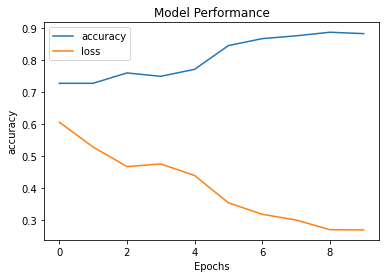

In [95]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [83]:
from tensorflow.keras.preprocessing import image
import numpy as np


In [86]:
pneumonia_img  = image.load_img('/content/data/chest_xray/train/PNEUMONIA/person1003_bacteria_2934.jpeg', target_size=(256,256))
pneumonia_img = image.img_to_array(pneumonia_img)
print(pneumonia_img.shape)
pneumonia_img = np.expand_dims(pneumonia_img, axis=0)
pneumonia_img = pneumonia_img/255
print(pneumonia_img.shape)


(256, 256, 3)
(1, 256, 256, 3)


In [87]:
prediction = model.predict(pneumonia_img)
print(f'Probabliltiy of that image to be a pneumonia ia:{prediction}')

Probabliltiy of that image to be a pneumonia ia:[[0.9576182]]


In [93]:
result = model.predict_classes(pneumonia_img)
print(result)


[[1]]
